<a href="https://colab.research.google.com/github/endrikrist/BengkelKoding/blob/main/klasifikasi_jenis_obat_menggukanan_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Endrianus Wahyu K**

**NIM : A11.2020.12568**

**Dataset ini berisi informasi tentang klasifikasi obat berdasarkan informasi umum pasien dan diagnosisnya. Model machine learning diperlukan untuk memprediksi hasil jenis obat yang mungkin cocok untuk pasien.**

Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

Load Data

In [2]:
df = pd.read_csv('/content/drug200.csv')

In [3]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


data understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [6]:
df.Drug.value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

data cleaning

In [7]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [8]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

EXPLORATORY DATA ANALYST (EDA)
Exploratory Data Analysis memungkinkan analyst memahami isi data yang digunakan, mulai dari distribusi, frekuensi, korelasi dan lainnya.

<ipython-input-9-924e108591d0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Drug' , data=df, palette='flare')


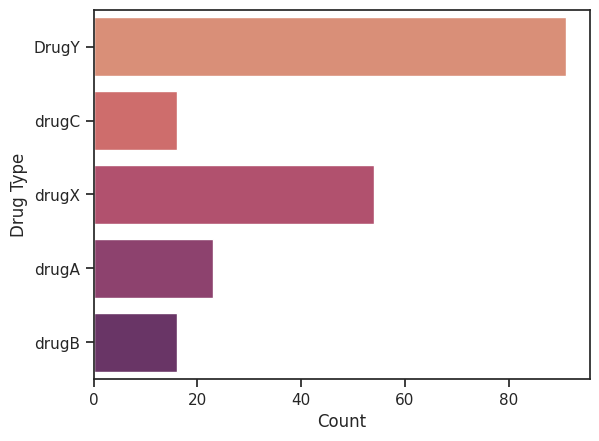

In [9]:
#Visualization drug type
sns.set_theme(style='ticks')
sns.countplot(y='Drug' , data=df, palette='flare')
plt.ylabel('Drug Type')
plt.xlabel('Count')
plt.show()

penggunaan obat berdasarkan obat

<Axes: xlabel='Drug', ylabel='Age'>

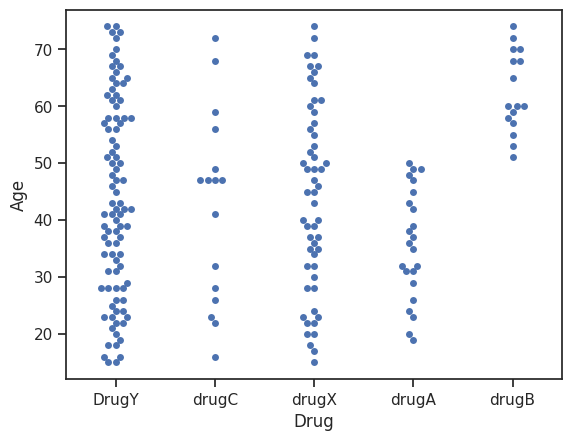

In [10]:
sns.swarmplot(x="Drug", y="Age", data=df)

In [11]:
sex_drug = df.groupby(['Sex', 'Drug']).size().reset_index(name = "Count")

sex_drug

,Sex,Drug,Count
0,F,DrugY,47
1,F,drugA,9
2,F,drugB,6
3,F,drugC,7
4,F,drugX,27
5,M,DrugY,44
6,M,drugA,14
7,M,drugB,10
8,M,drugC,9
9,M,drugX,27


penggunaan obat berdasarkan jenis kelamin

<Axes: xlabel='Drug', ylabel='Count'>

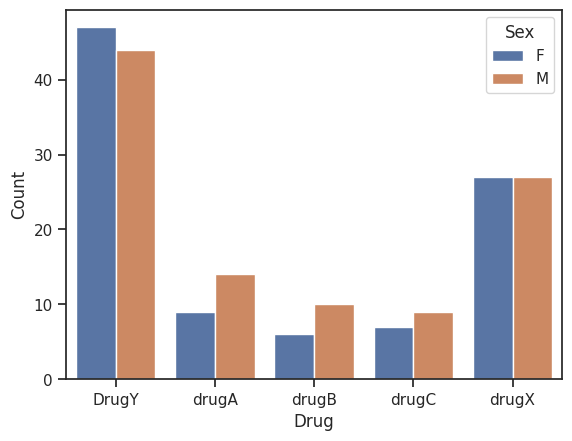

In [12]:
sns.barplot(x="Drug", y="Count", hue='Sex', data=sex_drug)

In [13]:
bp_drug = df.groupby(['BP', 'Drug']).size().reset_index(name = "Count")

bp_drug

,BP,Drug,Count
0,HIGH,DrugY,38
1,HIGH,drugA,23
2,HIGH,drugB,16
3,LOW,DrugY,30
4,LOW,drugC,16
5,LOW,drugX,18
6,NORMAL,DrugY,23
7,NORMAL,drugX,36


penggunaan obat berdasarkan tekanan darah

<Axes: xlabel='Drug', ylabel='Count'>

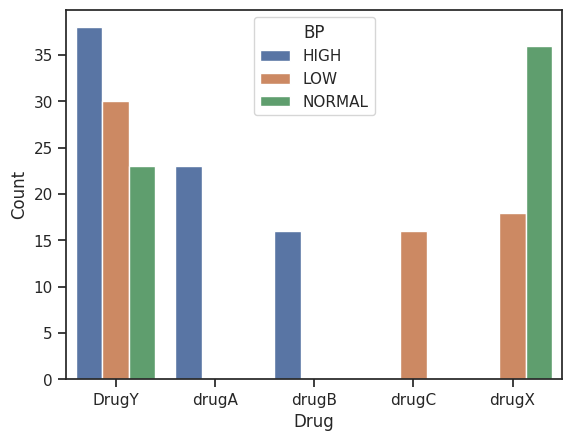

In [14]:
sns.barplot(x="Drug", y="Count", hue='BP', data=bp_drug)

Drug A and B : hanya digunakan untuk orang dengan tekanan darah tinggi

Drug C : hanya digunakan untuk orang dengan tekanan darah rendah

Drug X : tidak digunakan untuk orang dengan tekanan darah tinggi

Drug Y :digunakan untuk orang dengan semua tekanan darah

penggunakan obat berdasarkan kolesterol

In [15]:
cholesterol_drug = df.groupby(['Cholesterol', 'Drug']).size().reset_index(name = "Count")

cholesterol_drug

,Cholesterol,Drug,Count
0,HIGH,DrugY,47
1,HIGH,drugA,12
2,HIGH,drugB,8
3,HIGH,drugC,16
4,HIGH,drugX,20
5,NORMAL,DrugY,44
6,NORMAL,drugA,11
7,NORMAL,drugB,8
8,NORMAL,drugX,34


<Axes: xlabel='Drug', ylabel='Count'>

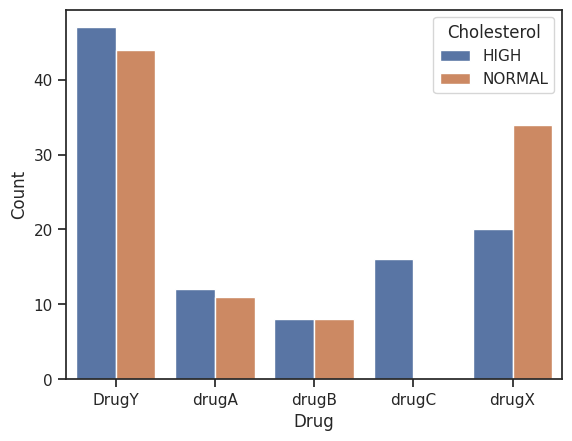

In [16]:
sns.barplot(x="Drug", y="Count", hue='Cholesterol', data=cholesterol_drug)

penggunaan obat berdasarkan Rasio Natrium Terhadap Kalium dalam Darah

<Axes: xlabel='Drug', ylabel='Na_to_K'>

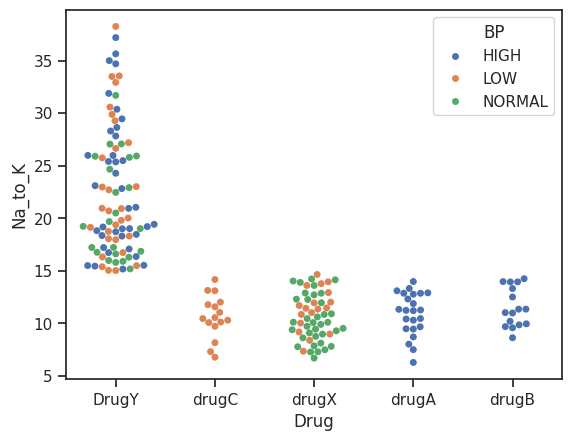

In [17]:
sns.swarmplot(x="Drug", y="Na_to_K", data=df, hue="BP")




*  Obat C digunakan oleh orang dengan rasio 15 atau lebih rendah dalam Korelasi Antara Tekanan Darah Rendah dan Na ke K
*   Obat A dan B digunakan oleh orang dengan rasio 15 atau lebih rendah dalam Korelasi Antara Tekanan Darah Tinggi dan Na ke k



<Axes: xlabel='Drug', ylabel='Na_to_K'>

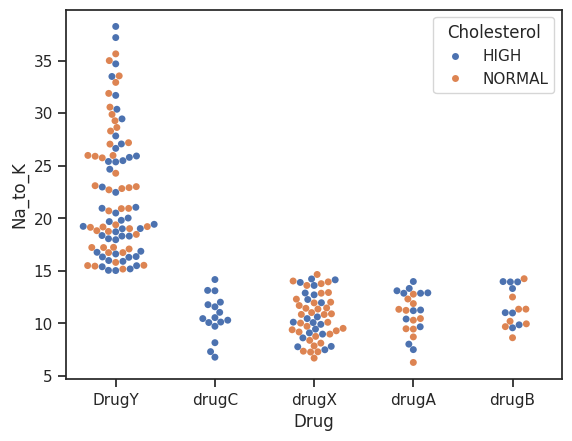

In [18]:
sns.swarmplot(x="Drug", y="Na_to_K", data=df, hue="Cholesterol")

Dari sini kita peroleh ciri-ciri orang yang mendapat Obat C sebagai berikut :

* Tekanan darah rendah
* Kolesterol Tinggi
* Rasio natrium dan kalium lebih rendah dari 15

Dan untuk Obat Y hanya digunakan oleh orang dengan rasio Natrium dan Kalium lebih besar dari 15.

**Data Processing**

In [19]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


konversi data non numeric menjadi numeric

In [20]:
label_encoder = LabelEncoder()

df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['BP'] = label_encoder.fit_transform(df['BP'])
df['Cholesterol'] = label_encoder.fit_transform(df['Cholesterol'])
df['Drug'] = label_encoder.fit_transform(df['Drug'])

In [21]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [22]:
X = df.drop(columns = ['Drug'])
y = df['Drug']

print("X : ", X.shape)
print("y : ", y.shape)

X :  (200, 5)
y :  (200,)


Splitting the Data

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
print(f"X_train : {X_train.shape}")
print(f"y_train : {y_train.shape}")
print(f"X_test : {X_test.shape}")
print(f"y_test : {y_test.shape}")

X_train : (160, 5)
y_train : (160,)
X_test : (40, 5)
y_test : (40,)


**Modeling**

KNN Clacifier

In [25]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
knn_pred = knn.predict (X_test)
knn_acc = accuracy_score(knn_pred, y_test)

print(classification_report(y_test, knn_pred))
print('KNN Accuration : {:.2f}%'.format(knn_acc*100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.60      0.50      0.55         6
           2       0.33      0.67      0.44         3
           3       1.00      0.20      0.33         5
           4       0.54      0.64      0.58        11

    accuracy                           0.70        40
   macro avg       0.69      0.60      0.58        40
weighted avg       0.76      0.70      0.69        40

KNN Accuration : 70.00%


0 : Drug Y

1 : Drug A

2 : Drug B

3 : Drug C

4 : Drug X

Text(0.5, 1.0, 'KNN : Confussion Matrix')

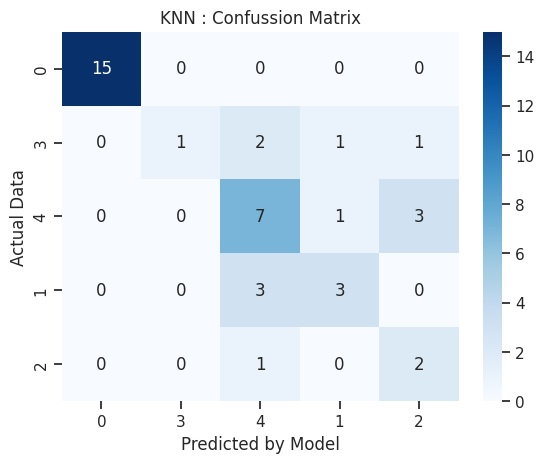

In [27]:
labels = y.unique()

knn_cm = confusion_matrix(y_test, knn_pred, labels=labels)

hmap = sns.heatmap(knn_cm,
           xticklabels=labels,
           yticklabels=labels,
           cmap="Blues", annot=True)

hmap.set(xlabel="Predicted by Model", ylabel="Actual Data")

plt.title("KNN : Confussion Matrix")

In [30]:
test = {'Age' : [30],
        'Sex' : [2],
        'BP' : [2],
        'Cholesterol' :[1],
        'Na_to_K' : [10]}

test = pd.DataFrame(test)
test

,Age,Sex,BP,Cholesterol,Na_to_K
0,30,2,2,1,10


In [31]:
pred_test = knn.predict(test)
print("Prediction from new patient")
print(pred_test)

Prediction from new patient
[1]
